Prediga el futuro a partir del pasado con una incrustación de retraso.

# ¿Qué es la dependencia serial?¶
En lecciones anteriores, investigamos las propiedades de las series de tiempo que se modelaban más fácilmente como propiedades dependientes del tiempo, es decir, con características que podíamos derivar directamente del índice de tiempo. Sin embargo, algunas propiedades de series temporales solo se pueden modelar como propiedades dependientes en serie, es decir, utilizando como características valores pasados ​​de la serie de destino. La estructura de estas series de tiempo puede no ser evidente en un gráfico a lo largo del tiempo; Sin embargo, si se compara con valores pasados, la estructura se vuelve clara, como vemos en la figura a continuación.

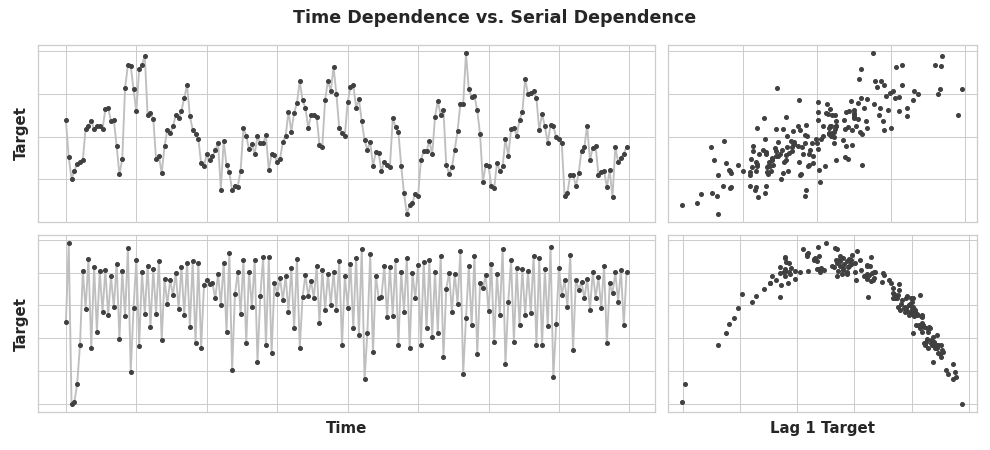

In [1]:
from IPython.display import Image
path = '../Kaglee/Data/Imagen_1_Lecc_4.png'
Image(path)

Estas dos series tienen dependencia serial, pero no dependencia temporal. Los puntos de la derecha tienen coordenadas (valor en el tiempo t-1, valor en el tiempo t).

Con la tendencia y la estacionalidad, entrenamos modelos para ajustar curvas a gráficos como los de la izquierda en la figura anterior: los modelos estaban aprendiendo la dependencia del tiempo. El objetivo de esta lección es entrenar modelos para ajustar curvas a gráficos como los de la derecha; queremos que aprendan la dependencia serial.

### Ciclos
Una forma especialmente común de que se manifieste la dependencia serial es en ciclos. Los ciclos son patrones de crecimiento y decrecimiento en una serie de tiempo asociados con la forma en que el valor de una serie en un momento depende de los valores en momentos anteriores, pero no necesariamente del paso de tiempo en sí. El comportamiento cíclico es característico de los sistemas que pueden afectarse a sí mismos o cuyas reacciones persisten en el tiempo. Las economías, las epidemias, las poblaciones animales, las erupciones volcánicas y fenómenos naturales similares a menudo muestran un comportamiento cíclico.

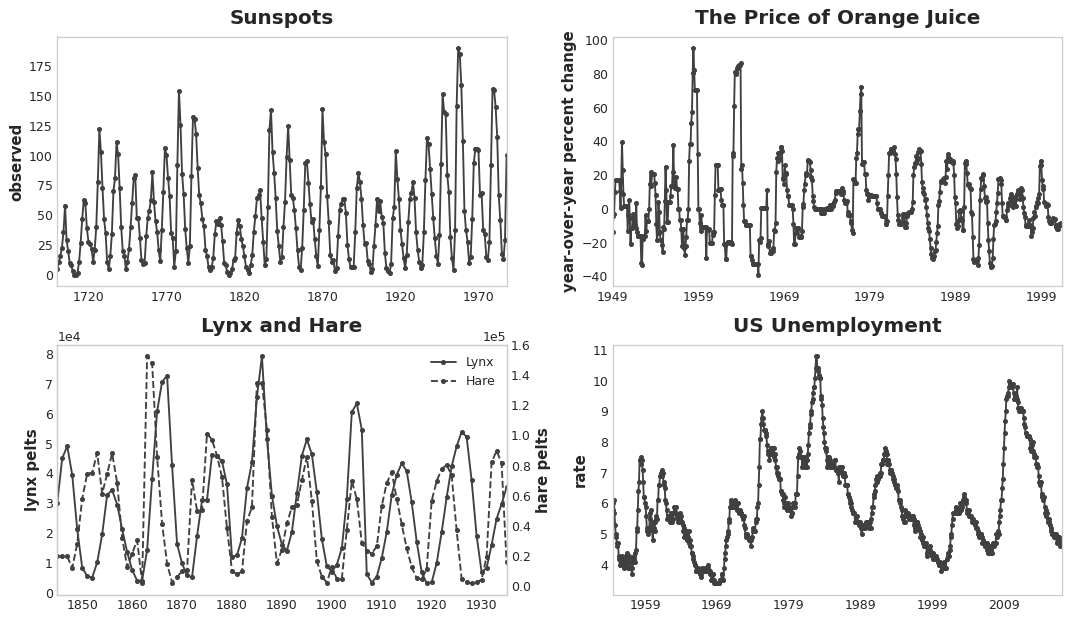

In [2]:
Image('../Kaglee/Data/Imagen_2_Lecc_4.png')

Cuatro series de tiempo con comportamiento cíclico.

Lo que distingue el comportamiento cíclico de la estacionalidad es que los ciclos no dependen necesariamente del tiempo, como lo son las estaciones. Lo que sucede en un ciclo tiene menos que ver con la fecha particular de ocurrencia y más con lo que sucedió en el pasado reciente. La independencia (al menos relativa) del tiempo significa que el comportamiento cíclico puede ser mucho más irregular que la estacionalidad.

### Series retrasadas y gráficas de retraso¶
Para investigar una posible dependencia serial (como ciclos) en una serie temporal, necesitamos crear copias "retrasadas" de la serie. Retrasar una serie de tiempo significa desplazar sus valores hacia adelante uno o más pasos de tiempo, o de manera equivalente, desplazar los tiempos en su índice hacia atrás uno o más pasos. En cualquier caso, el efecto es que las observaciones en la serie retrasada parecerán haber ocurrido más tarde en el tiempo.

Esto muestra la tasa de desempleo mensual en los EE. UU. (y) junto con su primera y segunda serie rezagada (y_lag_1 e y_lag_2, respectivamente). Observe cómo los valores de la serie retrasada se desplazan hacia delante en el tiempo.

In [4]:
import pandas as pd

# Federal Reserve dataset: https://www.kaggle.com/federalreserve/interest-rates
reserve = pd.read_csv(
    "../Kaglee/Data/reserve.csv",
    parse_dates={'Date': ['Year', 'Month', 'Day']},
    index_col='Date',
)

y = reserve.loc[:, 'Unemployment Rate'].dropna().to_period('M')
df = pd.DataFrame({
    'y': y,
    'y_lag_1': y.shift(1),
    'y_lag_2': y.shift(2),    
})

df.head()

,y,y_lag_1,y_lag_2
Date,,,
1954-07,5.8,NaN,NaN
1954-08,6.0,5.8,NaN
1954-09,6.1,6.0,5.8
1954-10,5.7,6.1,6.0
1954-11,5.3,5.7,6.1


In [ ]:
reserve['Unemployment Rate'].to_period()

Al retrasar una serie de tiempo, podemos hacer que sus valores pasados ​​parezcan contemporáneos con los valores que estamos tratando de predecir (en la misma fila, en otras palabras). Esto hace que las series retrasadas sean útiles como características para modelar la dependencia serial. Para pronosticar la serie de tasas de desempleo de EE. UU., podríamos usar y_lag_1 e y_lag_2 como características para predecir el objetivo y. Esto pronosticaría la futura tasa de desempleo en función de la tasa de desempleo en los dos meses anteriores.

In [ ]:
Lag plots¶
A lag plot of a time series shows its values plotted against its lags. Serial dependence in a time series will often become apparent by looking at a lag plot. We can see from this lag plot of US Unemployment that there is a strong and apparently linear relationship between the current unemployment rate and past rates.

### Gráficas de retraso¶
Un gráfico de retraso de una serie de tiempo muestra sus valores trazados contra sus retrasos. La dependencia serial en una serie de tiempo a menudo se hará evidente al observar un gráfico de retardo. Podemos ver en este diagrama de retrasos del desempleo de EE. UU. que existe una relación fuerte y aparentemente lineal entre la tasa de desempleo actual y las tasas pasadas.

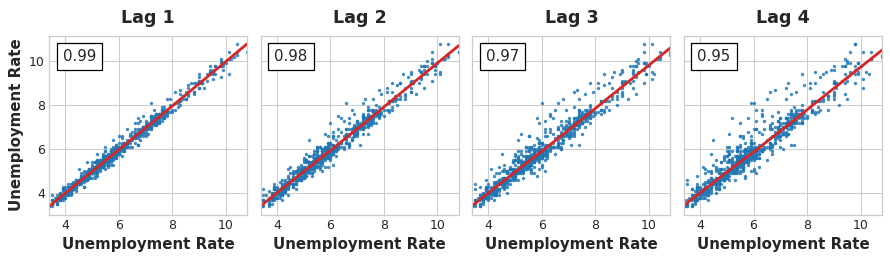

In [5]:
Image('../Kaglee/Data/Imagen_3_Lecc_4.png')

Gráfica de retraso del desempleo de EE. UU. con autocorrelaciones indicadas.

La medida de dependencia serial más utilizada se conoce como autocorrelación, que es simplemente la correlación que tiene una serie de tiempo con uno de sus rezagos. El desempleo de EE. UU. tiene una autocorrelación de 0,99 en el desfase 1, 0,98 en el desfase 2, y así sucesivamente.

### Elegir retrasos¶
Al elegir retrasos para usarlos como características, generalmente no será útil incluir todos los retrasos con una gran autocorrelación. En el desempleo de EE. UU., por ejemplo, la autocorrelación en el desfase 2 podría resultar enteramente de información "descompuesta" del desfase 1, solo correlación que se transfiere del paso anterior. Si el lag 2 no contiene nada nuevo, no habría razón para incluirlo si ya tenemos el lag 1.

La autocorrelación parcial le indica la correlación de un retraso que representa todos los retrasos anteriores: la cantidad de correlación "nueva" que contribuye el retraso, por así decirlo. Trazar la autocorrelación parcial puede ayudarlo a elegir qué características de retraso usar. En la figura a continuación, el rezago 1 al rezago 6 está fuera de los intervalos de "sin correlación" (en azul), por lo que podríamos elegir los rezagos 1 al 6 como características para el desempleo de EE. UU. (Lag 11 es probablemente un falso positivo).

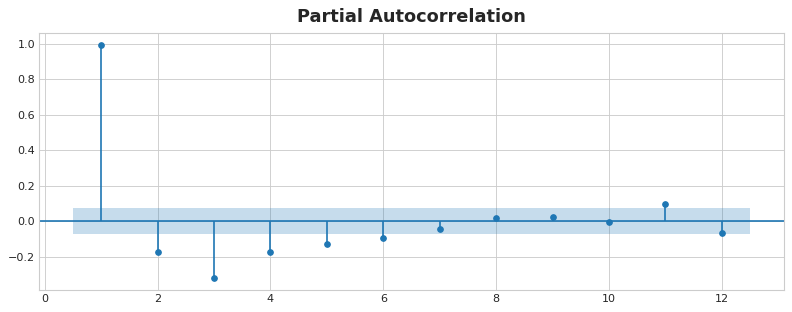

In [6]:
Image('../Kaglee/Data/Imagen_4_Lecc_4.png')

Autocorrelaciones parciales del desempleo de EE. UU. hasta el desfase 12 con intervalos de confianza del 95 % sin correlación.

Una gráfica como la anterior se conoce como correlograma. El correlograma es para las características de retardo esencialmente lo que es el periodograma para las características de Fourier.

Finalmente, debemos tener en cuenta que la autocorrelación y la autocorrelación parcial son medidas de dependencia lineal. Debido a que las series de tiempo del mundo real a menudo tienen dependencias no lineales sustanciales, es mejor mirar un gráfico de retraso (o usar alguna medida de dependencia más general, como información mutua) al elegir características de retraso. La serie Sunspots tiene retrasos con dependencia no lineal que podríamos pasar por alto con la autocorrelación.

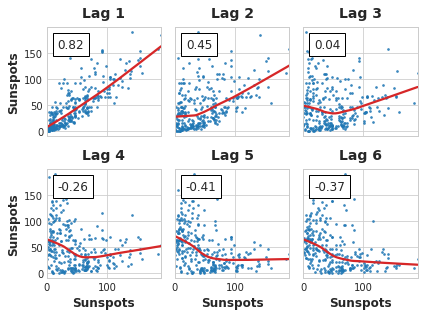

In [7]:
Image('../Kaglee/Data/Imagen_5_Lecc_4.png')

Gráfica de retraso de la serie Sunspots

Las relaciones no lineales como estas pueden transformarse en lineales o aprenderse mediante un algoritmo apropiado.

## Ejemplo - Tendencias de la gripe¶
El conjunto de datos de Flu Trends contiene registros de consultas médicas por influenza durante semanas entre 2009 y 2016. Nuestro objetivo es pronosticar la cantidad de casos de influenza para las próximas semanas.

Tomaremos dos enfoques. 

En el primero, pronosticaremos las visitas al médico usando funciones de retraso.

Nuestro segundo enfoque será pronosticar las visitas al médico utilizando retrasos de otro conjunto de series de tiempo: términos de búsqueda relacionados con la gripe capturados por Google Trends.

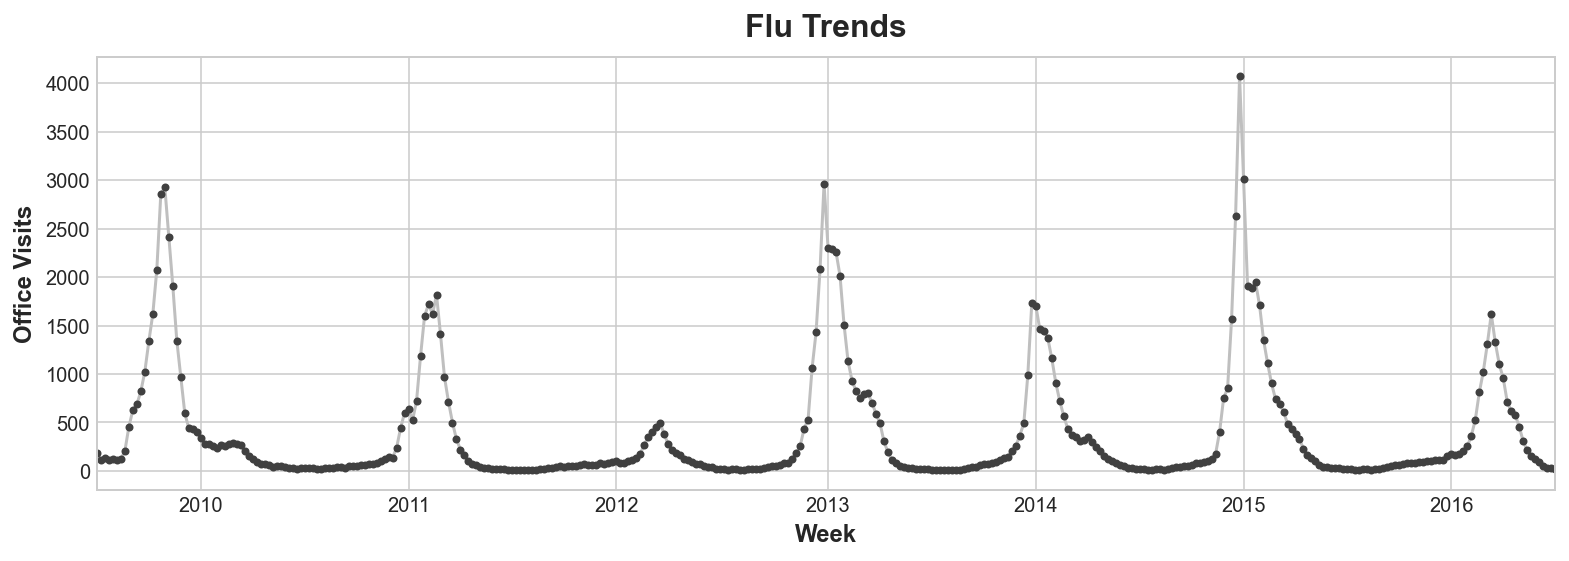

In [8]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig



flu_trends = pd.read_csv('../Kaglee/Data/flu-trends.csv')
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

Nuestros datos de Flu Trends muestran ciclos irregulares en lugar de una estacionalidad regular: el pico tiende a ocurrir alrededor del nuevo año, pero a veces antes o después, a veces más o menos. Modelar estos ciclos con características de retraso permitirá que nuestro pronosticador reaccione dinámicamente a las condiciones cambiantes en lugar de estar limitado a fechas y horas exactas como con las características estacionales.

Primero echemos un vistazo a los gráficos de retraso y autocorrelación:

In [9]:
flu_trends.head()

,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,ColdVersusFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,8,...,16,6,13,25,34,30,25,24,15,180
2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,8,...,16,7,8,27,32,27,28,29,9,115
2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,8,...,16,6,9,24,28,25,25,25,9,132
2009-07-20/2009-07-26,23,19,40,15,10,19,12,7,10,15,...,8,5,12,21,26,26,29,24,13,109
2009-07-27/2009-08-02,27,21,44,20,11,19,17,8,10,15,...,8,8,12,33,29,21,27,30,9,120


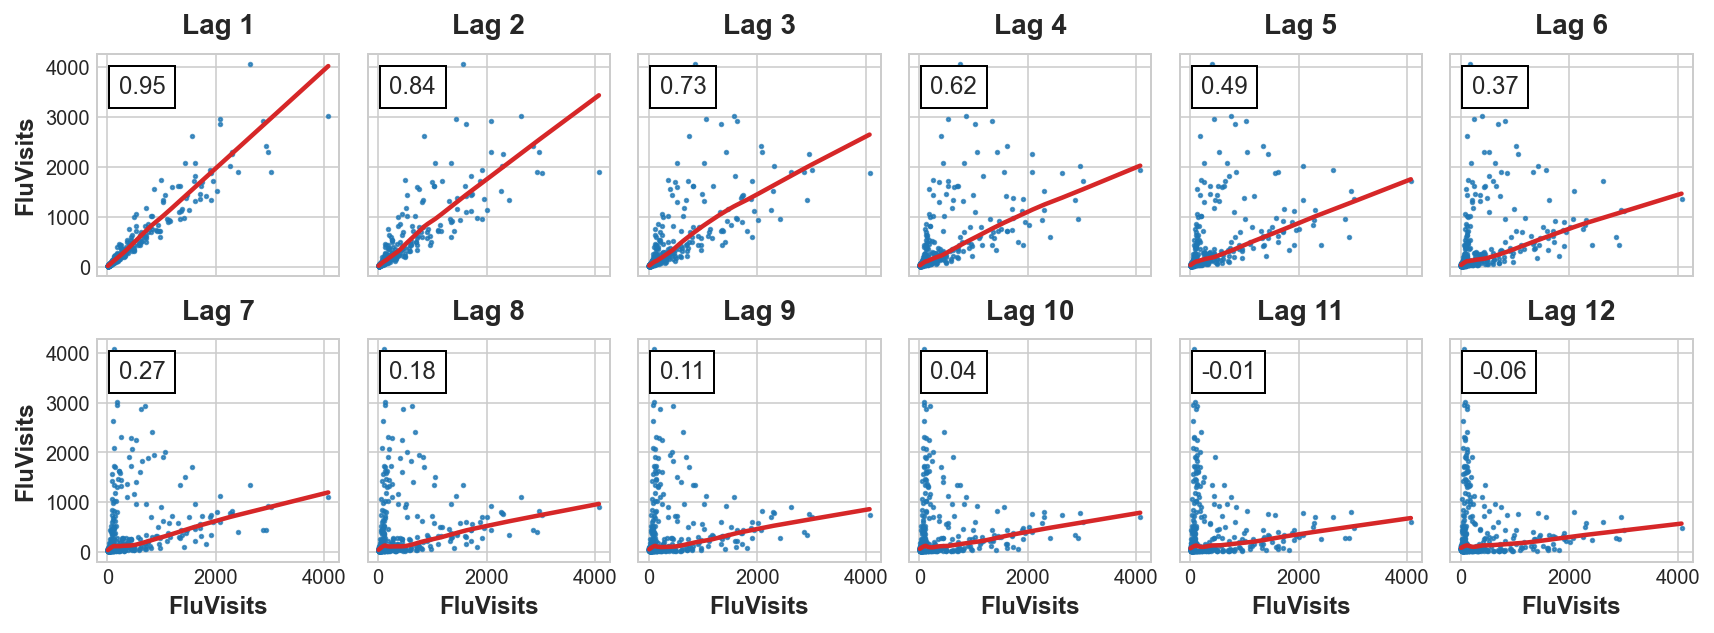

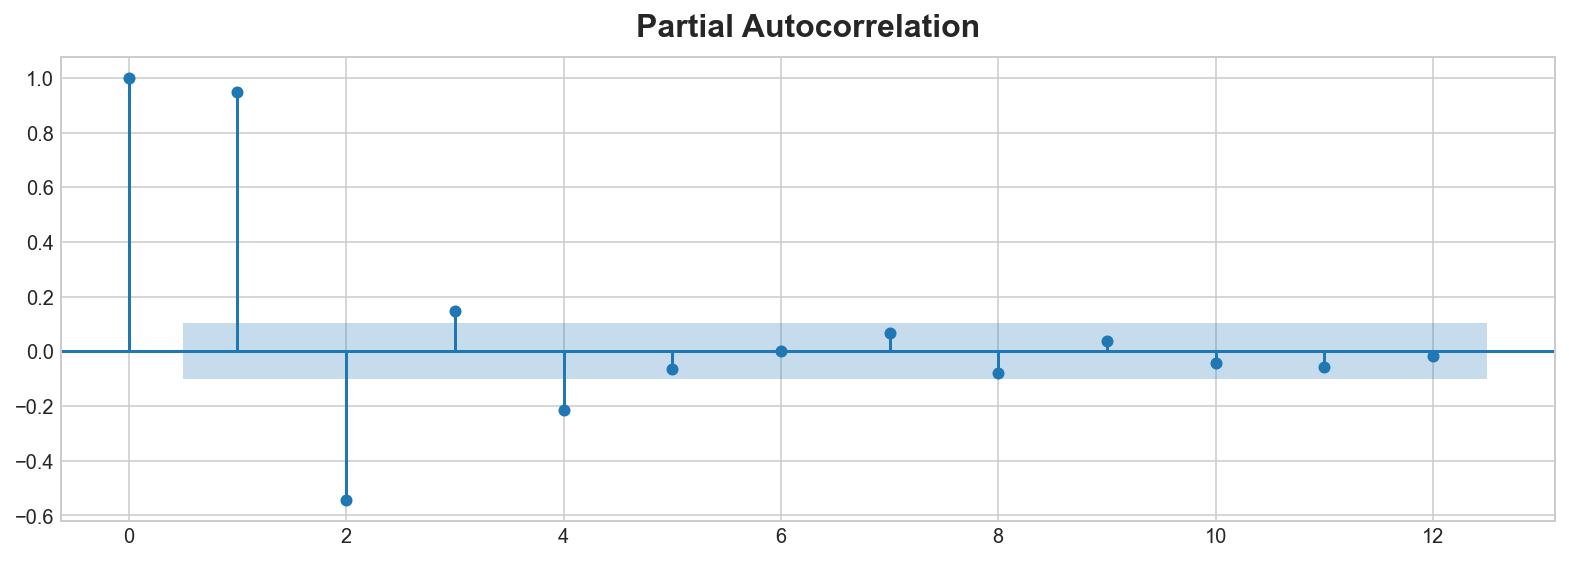

In [10]:
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
_ = plot_pacf(flu_trends.FluVisits, lags=12)

Los diagramas de retraso indican que la relación de FluVisits con sus retrasos es principalmente lineal, mientras que las autocorrelaciones parciales sugieren que la dependencia se puede capturar usando los retrasos 1, 2, 3 y 4. Podemos retrasar una serie de tiempo en Pandas con el método de cambio. Para este problema, completaremos los valores faltantes que crea el retardo con 0.0.

In [13]:
def make_lags(ts, lags):
    '''
    ts: Es una serie o un campo de un DF.
    '''
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(flu_trends.FluVisits, lags=4)
X = X.fillna(0.)     

In [12]:
X

,y_lag_1,y_lag_2,y_lag_3,y_lag_4
Week,,,,
2009-06-29/2009-07-05,0.0,0.0,0.0,0.0
2009-07-06/2009-07-12,180.0,0.0,0.0,0.0
2009-07-13/2009-07-19,115.0,180.0,0.0,0.0
2009-07-20/2009-07-26,132.0,115.0,180.0,0.0
2009-07-27/2009-08-02,109.0,132.0,115.0,180.0
...,...,...,...,...
2016-05-30/2016-06-05,124.0,156.0,211.0,305.0
2016-06-06/2016-06-12,90.0,124.0,156.0,211.0
2016-06-13/2016-06-19,55.0,90.0,124.0,156.0


En lecciones anteriores, pudimos crear pronósticos para tantos pasos como quisiéramos más allá de los datos de entrenamiento. Sin embargo, cuando usamos funciones de retraso, nos limitamos a pronosticar pasos de tiempo cuyos valores retrasados ​​​​están disponibles. Usando una función de retraso 1 el lunes, no podemos hacer un pronóstico para el miércoles porque el valor de retraso 1 necesario es el martes, que aún no ha sucedido.

Veremos estrategias para manejar este problema en la Lección 6. Para este ejemplo, solo usaremos valores de un conjunto de prueba.

In [88]:
# Create target series and data splits
y = flu_trends.FluVisits.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

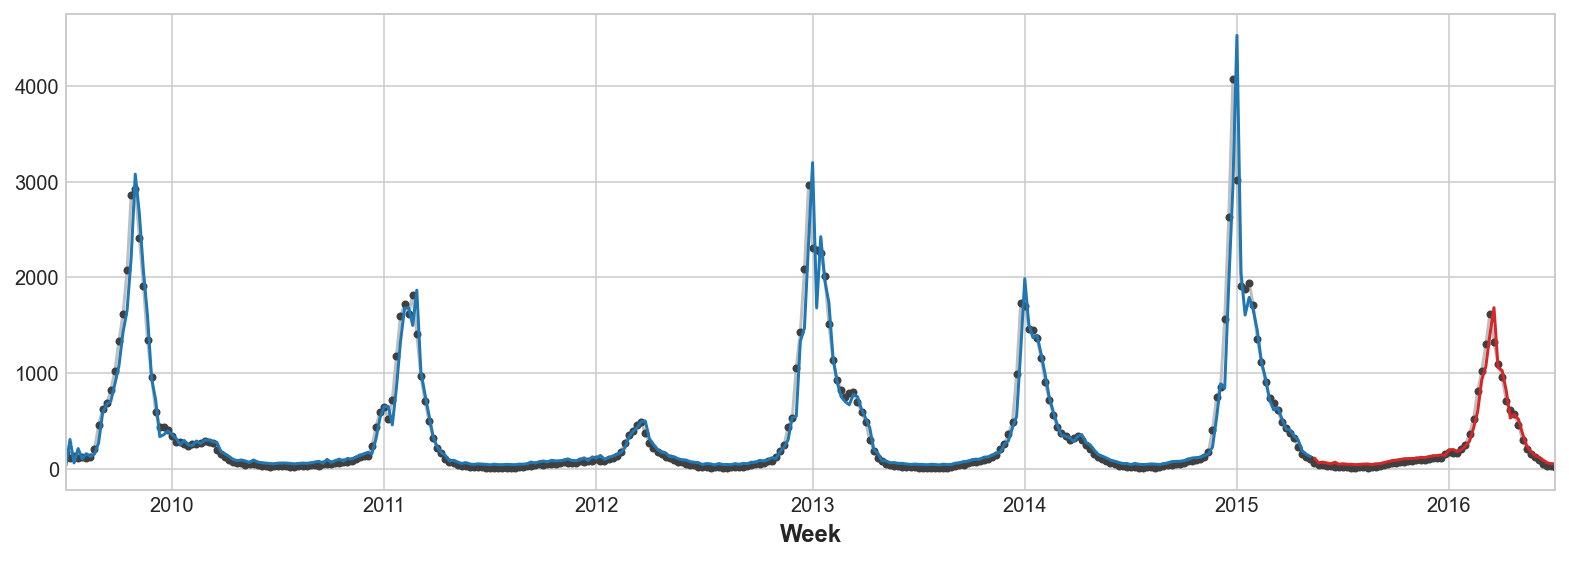

In [89]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

In [85]:
y_pred.head(), y_train.head()

(Week
 2009-06-29/2009-07-05     35.0
 2009-07-06/2009-07-12    307.0
 2009-07-13/2009-07-19     63.0
 2009-07-20/2009-07-26    212.0
 2009-07-27/2009-08-02    106.0
 Freq: W-SUN, dtype: float64,
 Week
 2009-06-29/2009-07-05    180.0
 2009-07-06/2009-07-12    115.0
 2009-07-13/2009-07-19    132.0
 2009-07-20/2009-07-26    109.0
 2009-07-27/2009-08-02    120.0
 Freq: W-SUN, Name: FluVisits, dtype: float64)

In [91]:
y_train = y_train.astype('float64')
y_pred = y_pred.round()

In [92]:
from sklearn.metrics import accuracy_score
#accuracy_score([2.0,2.0,2.458],[2,1,2])
accuracy_score(y_pred.values,y_train.values, normalize=True, sample_weight=None)


0.0

Mirando solo los valores de pronóstico, podemos ver cómo nuestro modelo necesita un paso de tiempo para reaccionar a cambios repentinos en la serie objetivo. Esta es una limitación común de los modelos que usan solo retrasos de la serie objetivo como características.

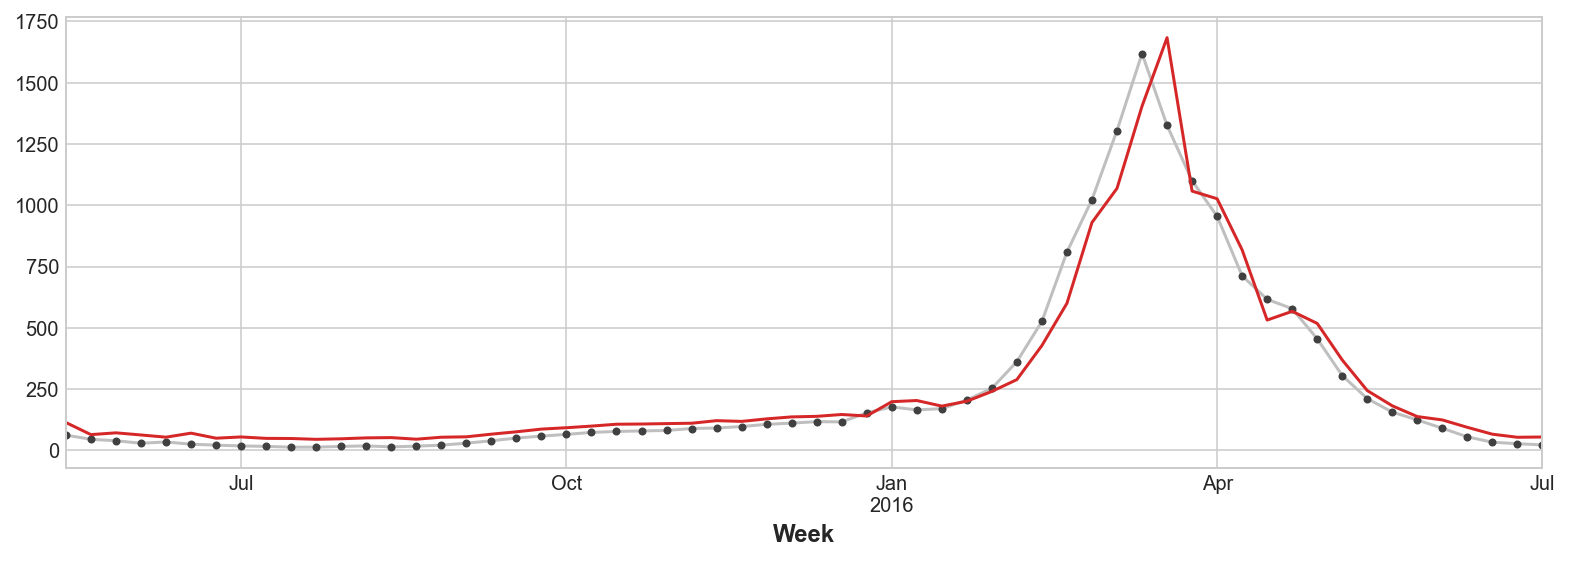

In [93]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

Para mejorar el pronóstico, podríamos intentar encontrar indicadores adelantados, series de tiempo que pudieran proporcionar una "alerta temprana" para cambios en los casos de gripe. Para nuestro segundo enfoque, agregaremos a nuestros datos de capacitación la popularidad de algunos términos de búsqueda relacionados con la gripe según lo medido por Google Trends.

Trazar la frase de búsqueda 'FluCough' contra el objetivo 'FluVisits' sugiere que dichos términos de búsqueda podrían ser útiles como indicadores principales: las búsquedas relacionadas con la gripe tienden a volverse más populares en las semanas previas a las visitas al consultorio.

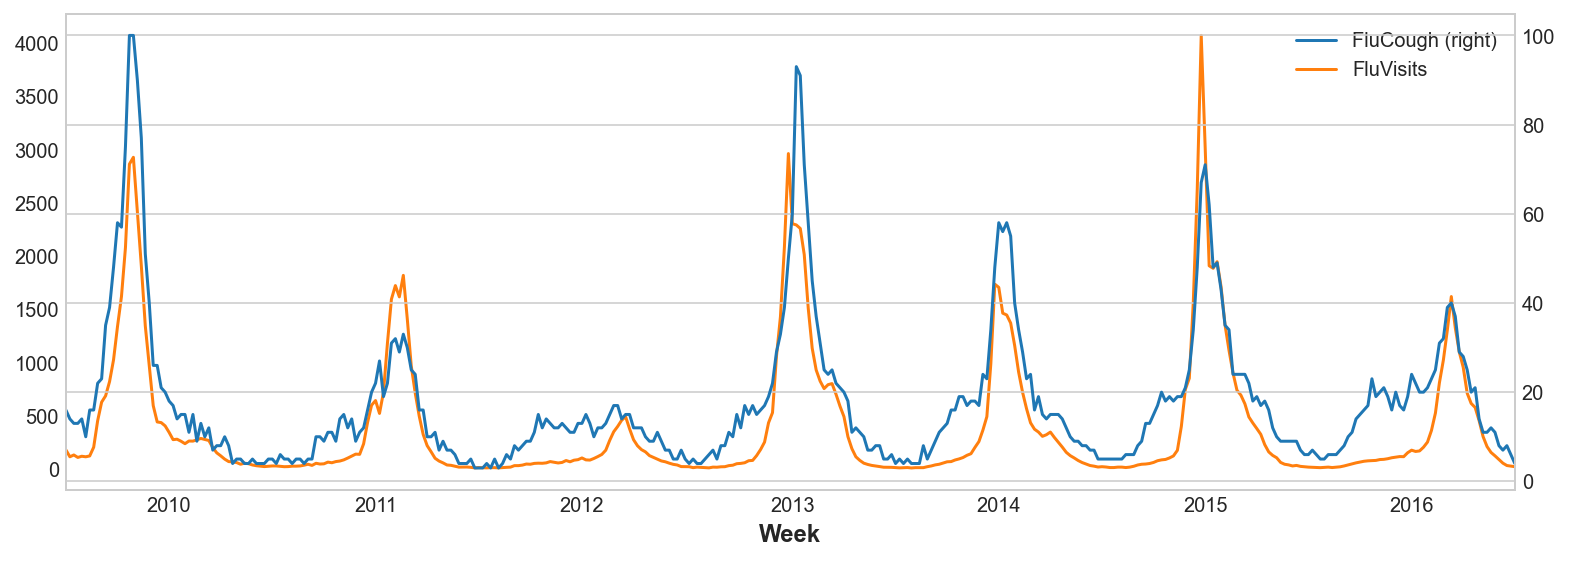

In [94]:
ax = flu_trends.plot(
    y=["FluCough", "FluVisits"],
    secondary_y="FluCough",
)

El conjunto de datos contiene 129 términos de este tipo, pero solo usaremos algunos.

In [95]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

# Create three lags for each search term
X0 = make_lags(flu_trends[search_terms], lags=3)

# Create four lags for the target, as before
X1 = make_lags(flu_trends['FluVisits'], lags=4)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

In [96]:
X

,"(y_lag_1, FluContagious)","(y_lag_1, FluCough)","(y_lag_1, FluFever)","(y_lag_1, InfluenzaA)","(y_lag_1, TreatFlu)","(y_lag_1, IHaveTheFlu)","(y_lag_1, OverTheCounterFlu)","(y_lag_1, HowLongFlu)","(y_lag_2, FluContagious)","(y_lag_2, FluCough)",...,"(y_lag_3, FluFever)","(y_lag_3, InfluenzaA)","(y_lag_3, TreatFlu)","(y_lag_3, IHaveTheFlu)","(y_lag_3, OverTheCounterFlu)","(y_lag_3, HowLongFlu)",y_lag_1,y_lag_2,y_lag_3,y_lag_4
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-07-06/2009-07-12,5.0,16.0,15.0,36.0,6.0,5.0,11.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0
2009-07-13/2009-07-19,6.0,14.0,15.0,25.0,12.0,7.0,7.0,7.0,5.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,115.0,180.0,0.0,0.0
2009-07-20/2009-07-26,6.0,13.0,13.0,24.0,8.0,8.0,7.0,7.0,6.0,14.0,...,15.0,36.0,6.0,5.0,11.0,6.0,132.0,115.0,180.0,0.0
2009-07-27/2009-08-02,5.0,13.0,12.0,23.0,5.0,4.0,6.0,6.0,6.0,13.0,...,15.0,25.0,12.0,7.0,7.0,7.0,109.0,132.0,115.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-30/2016-06-05,5.0,11.0,10.0,6.0,6.0,11.0,9.0,6.0,5.0,12.0,...,13.0,9.0,10.0,11.0,8.0,10.0,124.0,156.0,211.0,305.0
2016-06-06/2016-06-12,4.0,8.0,11.0,5.0,5.0,9.0,6.0,6.0,5.0,11.0,...,11.0,8.0,6.0,11.0,10.0,9.0,90.0,124.0,156.0,211.0
2016-06-13/2016-06-19,3.0,7.0,9.0,5.0,5.0,8.0,5.0,6.0,4.0,8.0,...,10.0,6.0,6.0,11.0,9.0,6.0,55.0,90.0,124.0,156.0


Nuestros pronósticos son un poco más aproximados, pero nuestro modelo parece ser más capaz de anticipar aumentos repentinos en las visitas de gripe, lo que sugiere que las diversas series temporales de popularidad de búsqueda fueron realmente efectivas como indicadores principales.

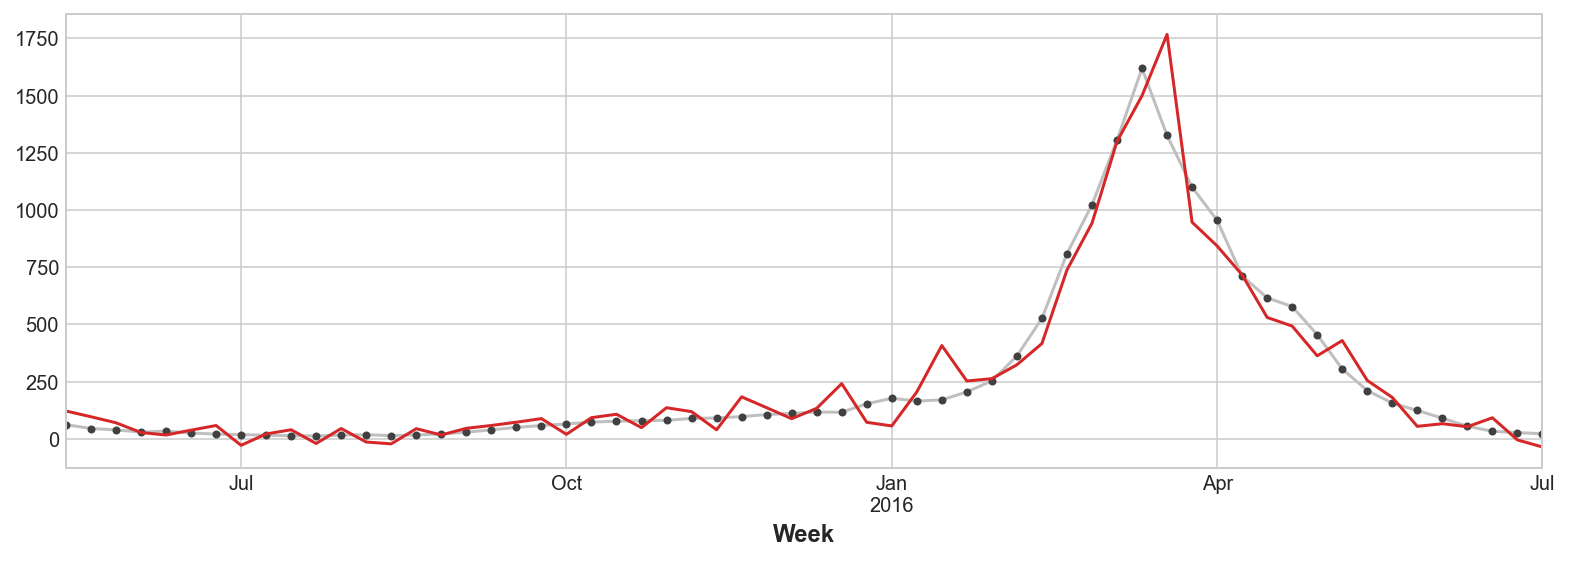

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

Las series de tiempo ilustradas en esta lección son lo que podría llamarse "puramente cíclicas": no tienen una tendencia o estacionalidad obvias. Sin embargo, no es raro que las series de tiempo posean tendencia, estacionalidad y ciclos, los tres componentes a la vez. Podría modelar tales series con regresión lineal simplemente agregando las características apropiadas para cada componente. Incluso puede combinar modelos entrenados para aprender los componentes por separado, lo que aprenderemos a hacer en la siguiente lección con pronósticos híbridos.

# Preguntas utilies:
1-. ¿Alguno de los retrasos es significativo según el correlograma? 

2.-¿La gráfica del retraso sugiere alguna relación que no fuera evidente en el correlograma?